##About Delhivery:
Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating
the commerce operating system.

Delhivery aims to establish itself as the premier player in the logistics industry.This case study provides a practical framework for understanding and processing data, which is
integral to their operations and enables the extraction of valuable features from raw data, which can be
utilized for building accurate forecasting models.


Problem Statement:

The company wants to understand and process the data coming out of data engineering
pipelines:
* Clean, sanitize and manipulate data to get useful features out of raw fields
* Make sense out of the raw data and help the data science team to build forecasting
models on it.

Column Profiling:
  * data - tells whether the data is testing or training data
  * trip_creation_time – Timestamp of trip creation
  *  route_schedule_uuid – Unique ID for a particular route schedule
  *  route_type – Transportation type
* FTL – Full Truck Load: FTL shipments get to the destination sooner, as the
truck
is making no other pickups or drop-offs along the way
*  Carting: Handling system consisting of small vehicles (carts)
  *  trip_uuid - Unique ID given to a particular trip (A trip may include different source and
destination centers)
  *  source_center - Source ID of trip origin
  *  source_name - Source Name of trip origin
  *  destination_cente – Destination ID
  *  destination_name – Destination Name
  *  od_start_time – Trip start time

  *  od_end_time – Trip end time
  *  start_scan_to_end_scan – Time taken to deliver from source to destination
  *  is_cutoff – Unknown field
  *  cutoff_factor – Unknown field
  *  cutoff_timestamp – Unknown field
  *  actual_distance_to_destination – Distance in kms between source and destination
warehouse
  *  actual_time – Actual time taken to complete the delivery (Cumulative)
  *  osrm_time – An open-source routing engine time calculator which computes the
shortest path between points in a given map (Includes usual traffic, distance through
major and minor roads) and gives the time (Cumulative)
  *  osrm_distance – An open-source routing engine which computes the shortest path
between points in a given map (Includes usual traffic, distance through major and minor
roads) (Cumulative)
  *  factor – Unknown field
  *  segment_actual_time – This is a segment time. Time taken by the subset of the
package delivery
  *  segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the
package delivery
  *  segment_osrm_distance – This is the OSRM distance. Distance covered by subset of
the package delivery
  *  segment_factor – Unknown field

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [ ]:
!gdown 1Np_q-PNL8RqnDBBtnb70JzWP4V2UUaRs

Downloading...
From: https://drive.google.com/uc?id=1Np_q-PNL8RqnDBBtnb70JzWP4V2UUaRs
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 181MB/s]


In [ ]:
df=pd.read_csv("delhivery_data.csv")
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.shape

(144867, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
np.any(df.duplicated())

False

In [ ]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
((df.isna().sum())/len(df))*100

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

In [ ]:
missing_source_names_center = df[df["source_name"].isna()].source_center.unique()
missing_source_names_center

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [ ]:
df[(df["source_center"].isin(missing_source_names_center)) & (df["source_name"].isna()==False)]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


As source_name and destination_name have some null values but their corresponding source_center and destination_center are known.  Therefore, we will be keeping those rows as it is while doing analysis on differnet time dependent columns of dataset. However, we will be dropping those rows while extracting city and state names from source_name and destination_name.

In [ ]:
# df.source_name = df.source_name.fillna("Missing")
# df.destination_name = df.destination_name.fillna("Missing")

In [ ]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

It is not known what does columns *'is_cutoff',  'cutoff_factor',
 'cutoff_timestamp',  'factor'*   and *'segment_factor'*  represent. These columns are dropped from dataset.

In [ ]:
unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns = unknown_fields)

In [ ]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


* Some of the entries for segment_actual_time are wrongly entered as negative values which can not be true. Changing such values with their modulus.

In [ ]:
df["segment_actual_time"] = df["segment_actual_time"].apply(lambda x: x*-1 if x<0 else x)

In [ ]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.208246,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.562957,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,0.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


* Huge difference in max values and 75th percentile for all numerical values indicating presence of outliers.

In [ ]:
df.describe(include="object")

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81


In [ ]:
for i in df.columns:
    print(f"Unique entries for column {i:<30} = {df[i].nunique()}")

Unique entries for column data                           = 2
Unique entries for column trip_creation_time             = 14817
Unique entries for column route_schedule_uuid            = 1504
Unique entries for column route_type                     = 2
Unique entries for column trip_uuid                      = 14817
Unique entries for column source_center                  = 1508
Unique entries for column source_name                    = 1498
Unique entries for column destination_center             = 1481
Unique entries for column destination_name               = 1468
Unique entries for column od_start_time                  = 26369
Unique entries for column od_end_time                    = 26369
Unique entries for column start_scan_to_end_scan         = 1915
Unique entries for column actual_distance_to_destination = 144515
Unique entries for column actual_time                    = 3182
Unique entries for column osrm_time                      = 1531
Unique entries for column osrm_distance 

In [ ]:
date_columns= ['trip_creation_time', 'od_start_time', 'od_end_time']
for i in date_columns:
    df[i] = pd.to_datetime(df[i])

In [ ]:
df[df["trip_uuid"]=="trip-153741093647649320"]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [ ]:
# defining segment key to group rows by combination of three columns trip_uuid, source_center and destination_center

df['segment_key'] = df['trip_uuid'] + "_" + df['source_center'] + "_" +  df['destination_center']

segment_columns = ['segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
for col in segment_columns:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()
df.head(6)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,20.0,21.7243
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,27.0,32.5395
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,39.0,45.5619
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,44.0,49.4772
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,15.0,11.0,12.1171,15.0,11.0,12.1171,trip-153741093647649320_IND388620AAB_IND388320AAA,15.0,11.0,12.1171


In [ ]:
create_segment_dict = {'data' : 'first',
                      'trip_creation_time': "first",
                      # 'route_schedule_uuid' : 'first',
                      'route_type' : 'first',
                      'trip_uuid' : 'first',

                      # 'source_center' : 'first',
                      'source_name' : 'first',
                      # 'destination_center' : 'last',
                      'destination_name' : 'last',

                      'od_start_time' : 'first',
                      'od_end_time' : 'last',
                      'start_scan_to_end_scan' : 'first',

                      'actual_distance_to_destination' : 'last',
                      'actual_time' : 'last',

                      'osrm_time' : 'last',
                      'osrm_distance' : 'last',

                      'segment_actual_time_sum' : 'last',
                      'segment_osrm_time_sum' : 'last',
                      'segment_osrm_distance_sum' : 'last'
                      }


In [ ]:
segment = df.groupby('segment_key').agg(create_segment_dict)

segment = segment.sort_values(by=['trip_uuid','od_end_time'], ascending = True).reset_index()
segment.head()

,segment_key,data,trip_creation_time,route_type,trip_uuid,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
1,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
2,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
3,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
4,trip-153671043369099517_IND562132AAA_IND000000ACB,training,2018-09-12 00:00:33.691250,FTL,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270


In [ ]:
segment.shape

(26368, 17)

In [ ]:
segment["od_time_diff_hour"] = ((segment["od_end_time"]- segment["od_start_time"]).dt.total_seconds())/60

In [ ]:
# Filter DataFrame for the trip ID
filtered_df = segment[segment["trip_uuid"] == "trip-153741093647649320"]

# Select desired columns
desired_columns = ["od_end_time", "od_start_time", "od_time_diff_hour"]
extracted_data = filtered_df[desired_columns]

print(extracted_data)

                     od_end_time              od_start_time  od_time_diff_hour
10374 2018-09-20 04:47:45.236797 2018-09-20 03:21:32.418600          86.213637
10375 2018-09-20 06:36:55.627764 2018-09-20 04:47:45.236797         109.173183


In [ ]:
# Dropping columns "od_end_time","od_start_time" and "start_scan_to_end_scan" as they wont be used for further analysis.
segment = segment.drop(["od_end_time","od_start_time","start_scan_to_end_scan"],axis=1)

In [ ]:
segment.source_name.unique()

array(['Bhopal_Trnsport_H (Madhya Pradesh)',
       'Kanpur_Central_H_6 (Uttar Pradesh)',
       'Tumkur_Veersagr_I (Karnataka)', ...,
       'Mahasamund_RajpurRD_D (Chhattisgarh)',
       'Badkulla_Central_DPP_1 (West Bengal)',
       'Kapadvanj_Busstand_D (Gujarat)'], dtype=object)

In [ ]:
# There are some missing information for source name and destination name and hence dropping those rows hereby as we cant extract city/state from those.
segment_city = segment.dropna( how = "any")

In [ ]:
def extract_city(code):
  s=(code.split("_"))[0]
  return s


segment_city["source_city"] = segment_city.source_name.apply(extract_city)
segment_city["destination_city"] = segment_city.destination_name.apply(extract_city)


In [ ]:
def extract_state(code):
  s=(code.split("("))[1]

  return s[:-1]

# print(extract_state("Kapadvanj_Busstand_D (Gujarat)"))
segment_city["source_state"] = segment_city.source_name.apply(extract_state)
segment_city["destination_state"] = segment_city.destination_name.apply(extract_state)

In [ ]:
segment_city.head()

,segment_key,data,trip_creation_time,route_type,trip_uuid,source_name,destination_name,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,source_city,destination_city,source_state,destination_state
0,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.505379,Bhopal,Kanpur,Madhya Pradesh,Uttar Pradesh
1,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.604421,Kanpur,Gurgaon,Uttar Pradesh,Haryana
2,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,122.779486,Tumkur,Doddablpur,Karnataka,Karnataka
3,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,58.832388,Doddablpur,Chikblapur,Karnataka,Karnataka
4,trip-153671043369099517_IND562132AAA_IND000000ACB,training,2018-09-12 00:00:33.691250,FTL,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270,3099.723591,Bangalore,Gurgaon,Karnataka,Haryana


In [ ]:
source_city_traffic = segment_city["source_city"].value_counts()
source_city_traffic

source_city
Bengaluru     1136
Gurgaon       1130
Bhiwandi       821
Bangalore      792
Mumbai         719
              ... 
Naharlagun       1
Pachora          1
Erandol          1
Amalner          1
Kapadvanj        1
Name: count, Length: 1260, dtype: int64

* Length: 1260 indicating unique source city count is 1260.

In [ ]:
segment_city["source_city"] = segment_city["source_city"].str.replace("Bangalore", "Bengaluru")

In [ ]:
source_city_traffic = segment_city["source_city"].value_counts()
source_city_traffic

source_city
Bengaluru     1928
Gurgaon       1130
Bhiwandi       821
Mumbai         719
Delhi          626
              ... 
Naharlagun       1
Pachora          1
Erandol          1
Amalner          1
Kapadvanj        1
Name: count, Length: 1259, dtype: int64

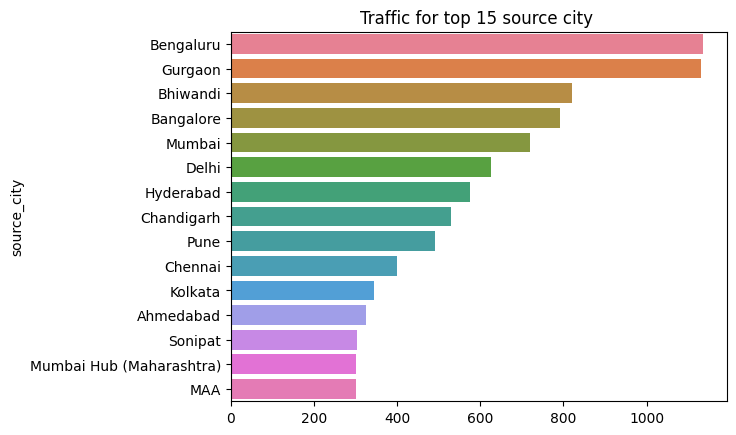

In [ ]:
sns.barplot(x=source_city_traffic.values[:15],y=source_city_traffic.index[:15],palette = "husl")
plt.title("Traffic for top 15 source city ")
plt.show()

In [ ]:
segment_city["destination_city"] = segment_city["destination_city"].str.replace("Bangalore", "Bengaluru")

In [ ]:
destination_city_traffic = segment_city["destination_city"].value_counts()
destination_city_traffic

destination_city
Bengaluru    1863
Mumbai       1000
Gurgaon       986
Hyderabad     643
Bhiwandi      614
             ... 
Amalner         1
Parbhani        1
Shivpuri        1
Koraput         1
Lunawada        1
Name: count, Length: 1255, dtype: int64

* Length :1256 indicating 1256 unique destination cities.

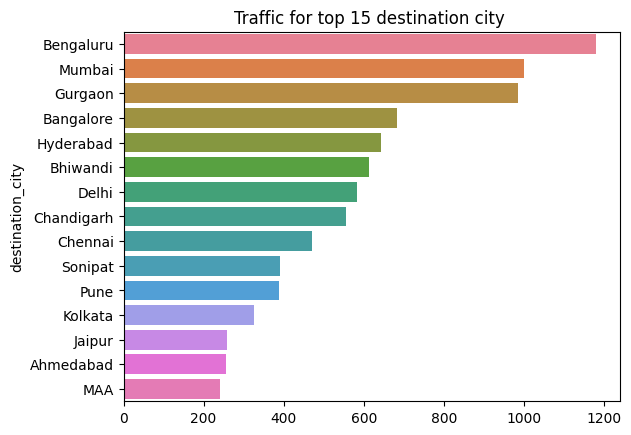

In [ ]:
sns.barplot(x=destination_city_traffic.values[:15],y=destination_city_traffic.index[:15],palette = "husl")
plt.title("Traffic for top 15 destination city ")
plt.show()

In [ ]:
source_state_traffic = segment_city["source_state"].value_counts()
print("source_state_traffic unique values :",source_state_traffic.nunique())
source_state_traffic

source_state_traffic unique values : 31


source_state
Maharashtra               3565
Karnataka                 3445
Tamil Nadu                2130
Haryana                   2039
Uttar Pradesh             1818
Telangana                 1474
Gujarat                   1401
West Bengal               1368
Andhra Pradesh            1310
Rajasthan                 1162
Punjab                    1052
Bihar                     1048
Delhi                      818
Kerala                     762
Madhya Pradesh             740
Assam                      484
Uttarakhand                369
Jharkhand                  301
Orissa                     248
Himachal Pradesh           223
Chandigarh                 160
Goa                         86
Chhattisgarh                52
Arunachal Pradesh           48
Jammu & Kashmir             47
Pondicherry                 30
Dadra and Nagar Haveli      15
Meghalaya                   13
Mizoram                      8
Nagaland                     5
Tripura                      1
Name: count, dtype: int64

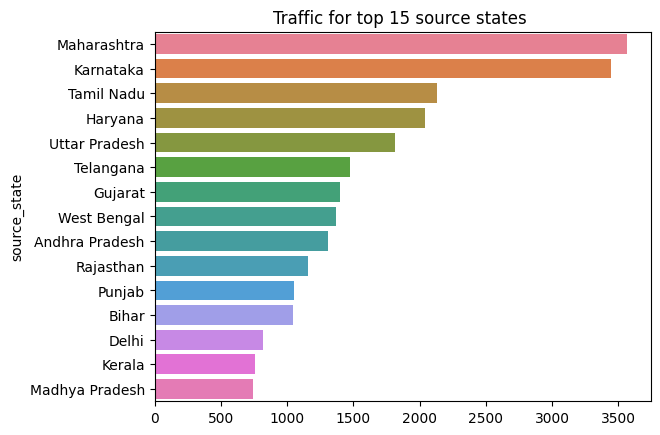

In [ ]:
sns.barplot(x=source_state_traffic.values[:15],y=source_state_traffic.index[:15],palette = "husl")
plt.title("Traffic for top 15 source states ")
plt.show()

In [ ]:
destination_state_traffic = segment_city["destination_state"].value_counts()
print("destination_state unique values :",destination_state_traffic.nunique())
destination_state_traffic

destination_state unique values : 31


destination_state
Karnataka                 3497
Maharashtra               3473
Tamil Nadu                2111
Haryana                   2014
Uttar Pradesh             1828
Telangana                 1539
Gujarat                   1401
West Bengal               1399
Andhra Pradesh            1309
Rajasthan                 1201
Punjab                    1132
Bihar                     1053
Kerala                     746
Madhya Pradesh             739
Delhi                      702
Assam                      465
Uttarakhand                367
Jharkhand                  309
Orissa                     260
Himachal Pradesh           241
Chandigarh                 123
Goa                         86
Arunachal Pradesh           55
Chhattisgarh                52
Jammu & Kashmir             45
Pondicherry                 31
Dadra and Nagar Haveli      17
Meghalaya                   13
Mizoram                     10
Tripura                      2
Nagaland                     1
Daman & Diu          

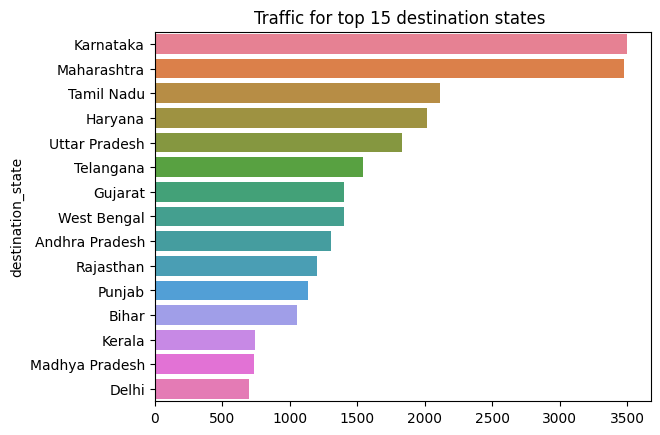

In [ ]:
sns.barplot(x=destination_state_traffic.values[:15],y=destination_state_traffic.index[:15],palette = "husl")
plt.title("Traffic for top 15 destination states ")
plt.show()

###Time Based analysis :

In [ ]:
# Extracting time based info from trip_creation_time
segment["Year"]=segment["trip_creation_time"].dt.year
segment["Month"]=segment["trip_creation_time"].dt.month
segment["Day"]=segment["trip_creation_time"].dt.day
segment["Day_of_week"] = segment["trip_creation_time"].dt.strftime("%A")
segment["Hour"]=segment["trip_creation_time"].dt.hour
segment.head(2)

,segment_key,data,trip_creation_time,route_type,trip_uuid,source_name,destination_name,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,Year,Month,Day,Day_of_week,Hour
0,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.505379,2018,9,12,Wednesday,0
1,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.604421,2018,9,12,Wednesday,0


In [ ]:
segment.Year.unique()

array([2018], dtype=int32)

In [ ]:
segment.Month.unique()

array([ 9, 10], dtype=int32)

* Dataset has trips only for two months September and October for 2018.

In [ ]:
day=segment.groupby("Day").segment_key.count()
day

Day
1     1050
2     1031
3     1128
12    1290
13    1320
14    1296
15    1293
16    1098
17    1293
18    1373
19    1155
20    1322
21    1361
22    1280
23    1085
24    1177
25    1330
26    1274
27    1169
28    1078
29    1034
30     931
Name: segment_key, dtype: int64

* No trips from 4th to 11th in both months.

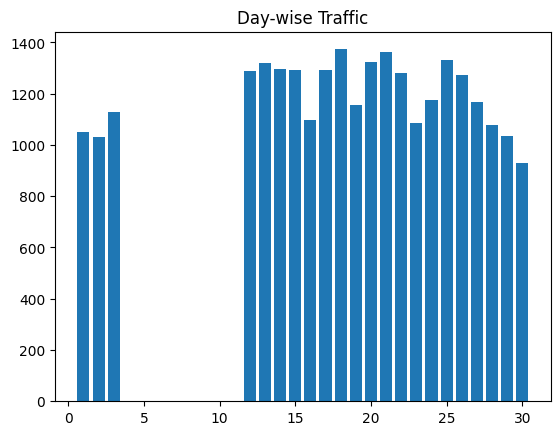

In [ ]:
plt.bar(day.index,day.values)
plt.title("Day-wise Traffic")
plt.show()

In [ ]:

Day_of_week = segment.groupby("Day_of_week")["segment_key"].count()
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Day_of_week = Day_of_week.reindex(desired_order)
Day_of_week

Day_of_week
Monday       3520
Tuesday      3734
Wednesday    4847
Thursday     3811
Friday       3735
Saturday     3607
Sunday       3114
Name: segment_key, dtype: int64

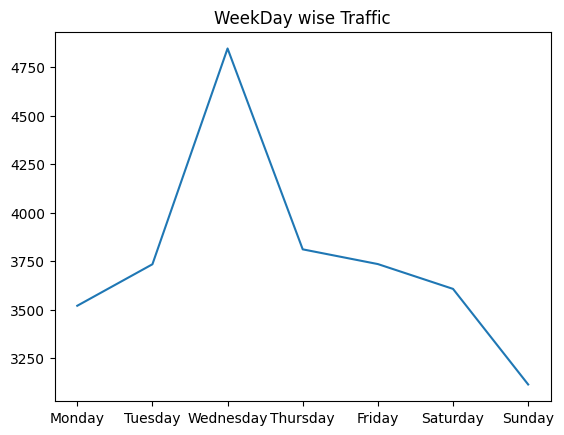

In [ ]:
plt.plot(Day_of_week.index,Day_of_week.values)
plt.title("WeekDay wise Traffic")
plt.show()

* Traffic is highest on Wednesdays.

In [ ]:
hour=segment.groupby("Hour").segment_key.count()
hour

Hour
0     1946
1     1569
2     1296
3     1061
4     1022
5      747
6      829
7      639
8      600
9      551
10     369
11     400
12     403
13     520
14     553
15     675
16     791
17     926
18    1137
19    1590
20    2142
21    1882
22    2440
23    2280
Name: segment_key, dtype: int64

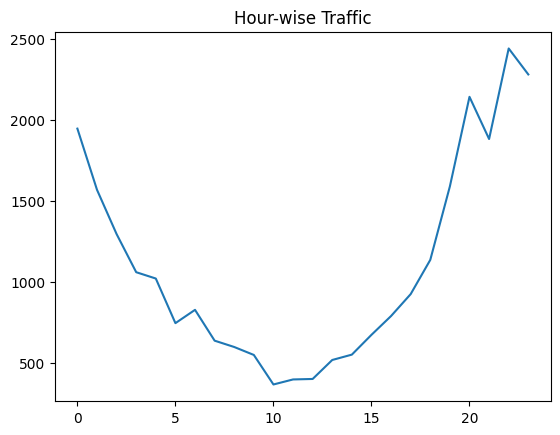

In [ ]:
plt.plot(hour.index,hour.values)
plt.title("Hour-wise Traffic")
plt.show()

* Quite relatable insight here. Most trips are started after 8 pm as traffic regulation ease off a little bit after 8 pm till 4 am.

###Trip Based Analysis :

In [ ]:
segment[["trip_uuid","actual_distance_to_destination", "actual_time", "osrm_time",
                   "osrm_distance", "segment_actual_time_sum", "segment_osrm_time_sum",
                   "segment_osrm_distance_sum"]][:4]

,trip_uuid,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
1,trip-153671041653548748,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
2,trip-153671042288605164,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
3,trip-153671042288605164,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995


In [ ]:
create_trip_dict = {'data' : 'first',
                      'trip_creation_time': "first",
                      # 'route_schedule_uuid' : 'first',
                      'route_type' : 'first',
                      # 'trip_uuid' : 'first',

                      # 'source_center' : 'first',
                      'source_name' : 'first',
                      # 'destination_center' : 'last',
                      'destination_name' : 'last',

                      # 'od_start_time' : 'first',
                      # 'od_end_time' : 'last',
                      # 'start_scan_to_end_scan' : 'first',

                      'actual_distance_to_destination' : 'sum',
                      'actual_time' : 'sum',

                      'osrm_time' : 'sum',
                      'osrm_distance' : 'sum',

                      'segment_actual_time_sum' : 'sum',
                      'segment_osrm_time_sum' : 'sum',
                      'segment_osrm_distance_sum' : 'sum',
                      'od_time_diff_hour': 'sum'
                      }


In [ ]:
segment_trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index()
segment_trip[:2]

,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2260.109800
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,181.611874


In [ ]:
segment_trip.shape

(14817, 14)

In [ ]:
segment_trip.describe()

,trip_creation_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
count,14817,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,2018-09-22 12:44:19.555167744,164.477838,357.143754,161.384018,204.344689,354.010933,180.949787,223.201161,531.795209
min,2018-09-12 00:00:16.535741,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,23.461468
25%,2018-09-17 02:51:25.129125888,22.837239,67.000000,29.000000,30.819200,66.000000,31.000000,32.654500,149.930591
50%,2018-09-22 04:02:35.066945024,48.474072,149.000000,60.000000,65.618800,147.000000,65.000000,70.154400,280.765626
75%,2018-09-27 19:37:41.898427904,164.583208,370.000000,168.000000,208.475000,367.000000,185.000000,218.802400,638.199071
max,2018-10-03 23:59:42.701692,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400,7898.551955
std,NaN,305.388147,561.396157,271.360995,370.395573,556.408881,314.542047,416.628374,659.184525


In [ ]:
segment_trip['data'] = segment_trip['data'].astype('category')
segment_trip['route_type'] = segment_trip['route_type'].astype('category')

route_type
Carting    8908
FTL        5909
Name: count, dtype: int64



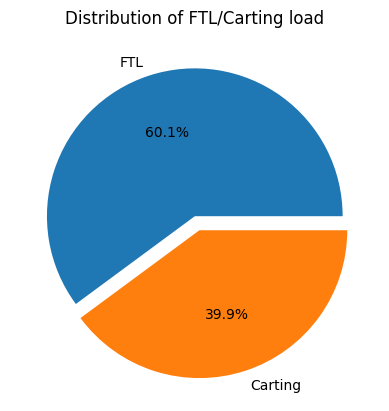

In [ ]:
cnt=segment_trip["route_type"].value_counts()
print(cnt)
print()
plt.pie(cnt,labels=["FTL","Carting"],autopct= '%1.1f%%', explode=[0,0.1])
plt.title("Distribution of FTL/Carting load")
plt.show()

* FTL is preferred over Carting. 60% of trips are Full load Truck and 40% follows Carting.

data
training    10654
test         4163
Name: count, dtype: int64



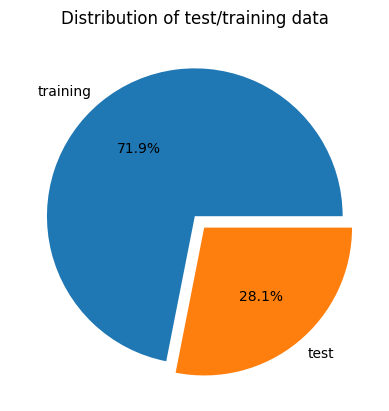

In [ ]:
cnt=segment_trip["data"].value_counts()
print(cnt)
print()
plt.pie(cnt,labels=["training","test"],autopct= '%1.1f%%', explode=[0,0.1])
plt.title("Distribution of test/training data")
plt.show()

* 72% of trips are done under training and rest 28% are for testing purpose.

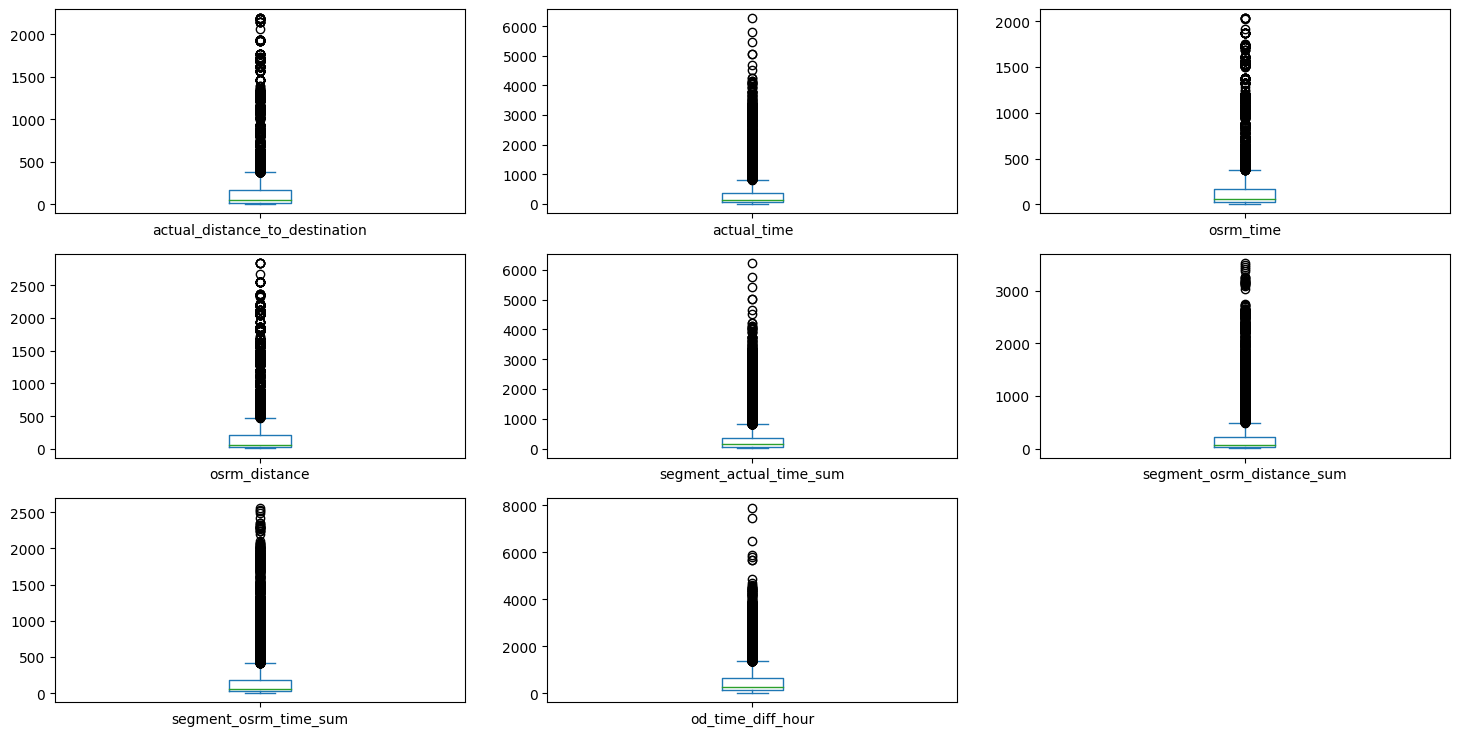

In [ ]:
num_cols = ['actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
           'segment_osrm_time_sum', 'od_time_diff_hour']

segment_trip[num_cols].plot(kind='box', subplots=True, layout=(3, 3), figsize=(18, 9))
plt.show()

22.83723905859321 164.58320763841138 141.74596857981817
67.0 370.0 303.0
29.0 168.0 139.0
30.8192 208.475 177.6558
66.0 367.0 301.0
32.6545 218.8024 186.1479
31.0 185.0 154.0
149.93059088333334 638.1990710833333 488.2684801999999


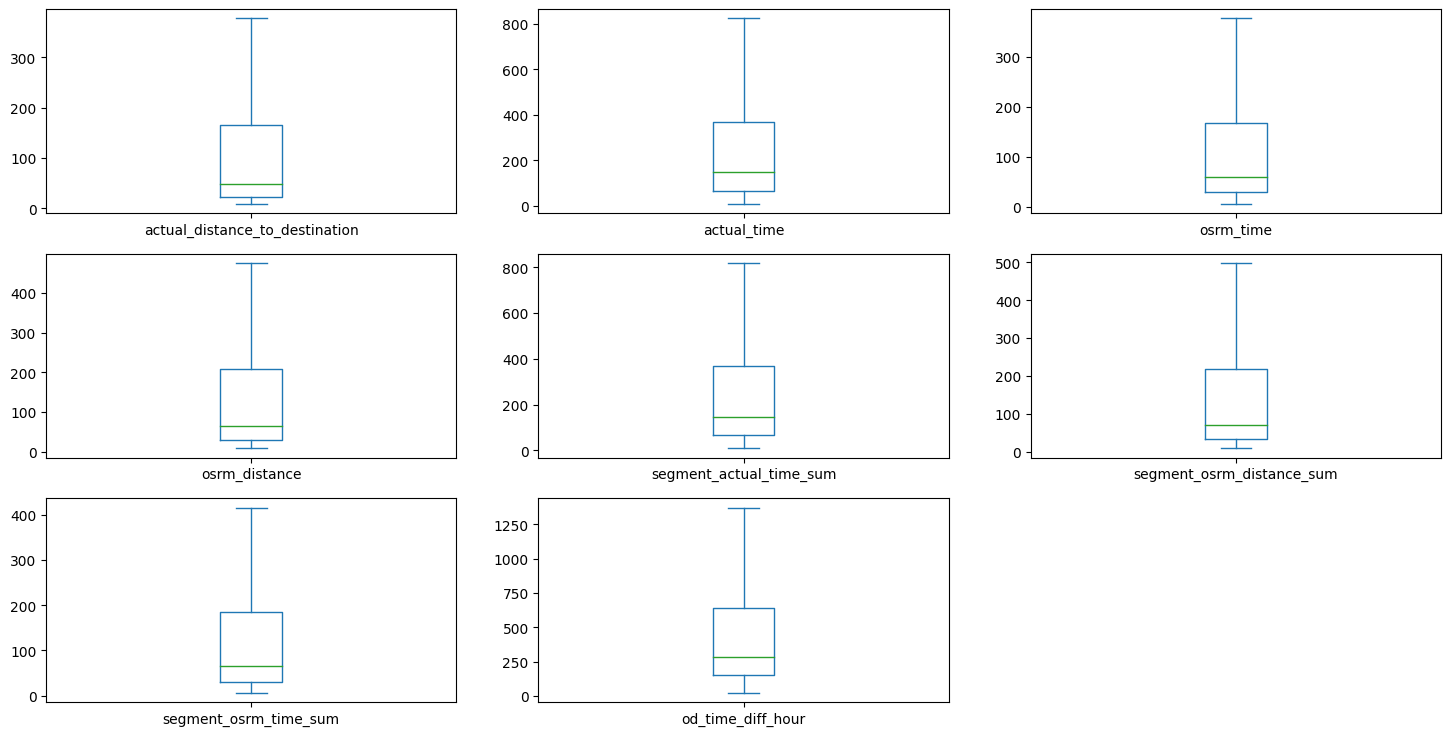

In [ ]:
# Clipping data to remove outliers

for i in num_cols:
  percentile_25 = np.percentile(segment_trip[i],25)
  percentile_75 = np.percentile(segment_trip[i],75)
  IQR = percentile_75 - percentile_25

  segment_trip[i] = np.clip(segment_trip[i],0,(percentile_75 + 1.5 * IQR))


segment_trip[num_cols].plot(kind='box', subplots=True, layout=(3, 3), figsize=(18, 9))
plt.show()

In [ ]:
segment_trip.describe()

,trip_creation_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
count,14817,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,2018-09-22 12:44:19.555167744,109.058543,263.849733,114.875380,138.518215,261.630526,126.123844,146.940017,454.333126
min,2018-09-12 00:00:16.535741,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,23.461468
25%,2018-09-17 02:51:25.129125888,22.837239,67.000000,29.000000,30.819200,66.000000,31.000000,32.654500,149.930591
50%,2018-09-22 04:02:35.066945024,48.474072,149.000000,60.000000,65.618800,147.000000,65.000000,70.154400,280.765626
75%,2018-09-27 19:37:41.898427904,164.583208,370.000000,168.000000,208.475000,367.000000,185.000000,218.802400,638.199071
max,2018-10-03 23:59:42.701692,377.202161,824.500000,376.500000,474.958700,818.500000,416.000000,498.024250,1370.601791
std,NaN,117.389485,260.944334,116.308921,147.724504,259.167873,128.453228,155.186921,410.241283


In [ ]:
segment_trip[["trip_uuid","actual_distance_to_destination", "actual_time", "osrm_time",
                   "osrm_distance", "segment_actual_time_sum", "segment_osrm_time_sum",
                   "segment_osrm_distance_sum"]][:10]

,trip_uuid,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748,377.202161,824.5,376.5,474.9587,818.5,416.0,498.02425
1,trip-153671042288605164,73.186911,143.0,68.0,85.1110,141.0,65.0,84.18940
2,trip-153671043369099517,377.202161,824.5,376.5,474.9587,818.5,416.0,498.02425
3,trip-153671046011330457,17.175274,59.0,15.0,19.6800,59.0,16.0,19.87660
4,trip-153671052974046625,127.448500,341.0,117.0,146.7918,340.0,115.0,146.79190
5,trip-153671055416136166,24.597048,61.0,23.0,28.0647,60.0,23.0,28.06470
6,trip-153671066201138152,9.100510,24.0,13.0,12.0184,24.0,13.0,12.01840
7,trip-153671066826362165,22.424210,64.0,34.0,28.9203,64.0,34.0,28.92030
8,trip-153671074033284934,25.454848,161.0,29.0,30.9359,161.0,29.0,30.93580
9,trip-153671079956500691,9.872146,23.0,8.0,9.9566,23.0,14.0,16.08600


* There seems to difference between osrm_distance and segment_osrm_distance_sum where osrm_distance is greater than 200.

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_key',
       'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum'],
      dtype='object')

In [ ]:
segment_trip[segment_trip["trip_uuid"]=="trip-153671041653548748"][['trip_uuid',
              'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum', 'od_time_diff_hour']].head()

,trip_uuid,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
0,trip-153671041653548748,377.202161,824.5,376.5,474.9587,818.5,416.0,498.02425,1370.601791


### Perform hypothesis testing / visual analysis between :


In [ ]:
import scipy.stats as stats


a. actual_time aggregated value and OSRM time aggregated value.

* Null Hypothesis (H_0) : actual_time aggregated value and OSRM time aggregated value are same.

* Alternate Hypothesis (H_a) : actual_time aggregated value and OSRM time aggregated value are not same.

Level of significance is considered to be 0.05.

Before apply T-test, we need to check for normality of data.

In [ ]:
print("Shapiro Normality test for actual_time aggregated value:",stats.shapiro(segment_trip.actual_time))
print("Shapiro Normality test for OSRM aggregated value:",stats.shapiro(segment_trip.osrm_time))

Shapiro Normality test for actual_time aggregated value: ShapiroResult(statistic=0.7887564897537231, pvalue=0.0)
Shapiro Normality test for OSRM aggregated value: ShapiroResult(statistic=0.7823594808578491, pvalue=0.0)


Both actual_time aggregated value and OSRM aggregated value failed Shapiro normality test.

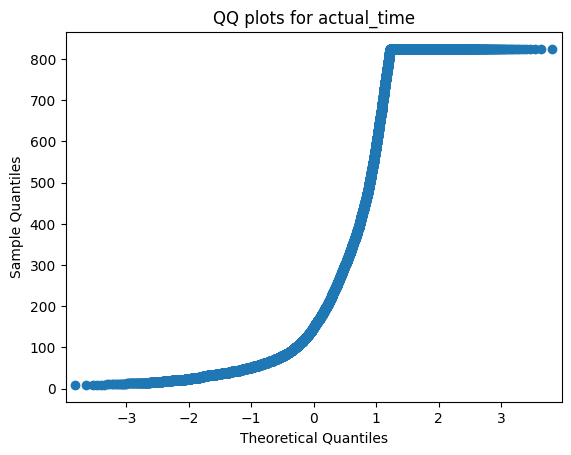

In [ ]:
import statsmodels.api as sm

sm.qqplot(data = segment_trip['actual_time'])
plt.title('QQ plots for actual_time')
plt.show()


[]

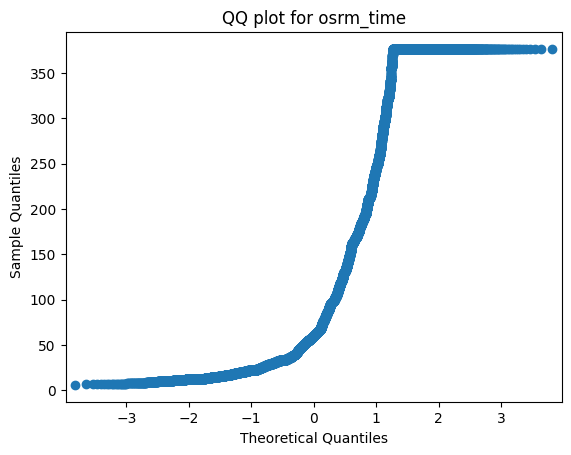

In [ ]:
sm.qqplot(data = segment_trip['osrm_time'])
plt.title('QQ plot for osrm_time')
plt.plot()

In [ ]:
print("Levene Variance test for actual_time aggregated value and OSRM aggregated value:"
      ,stats.levene(segment_trip.actual_time,segment_trip.osrm_time))

Levene Variance test for actual_time aggregated value and OSRM aggregated value: LeveneResult(statistic=3152.9754634742044, pvalue=0.0)


Both actual_time aggregated value and OSRM aggregated value failed Levene variance test as well.

we will be doing T-test and KS-test both.


In [ ]:
stats.ttest_ind(segment_trip.actual_time,segment_trip.osrm_time)

TtestResult(statistic=63.47374540609657, pvalue=0.0, df=29632.0)

In [ ]:
stats.kruskal(segment_trip.actual_time,segment_trip.osrm_time)

KruskalResult(statistic=3813.5845479825994, pvalue=0.0)

**p-value for T-test and for Kruskal-Wallis test are less than 0.05, we can confidently state that OSRM time aggregated value and segment OSRM time aggregated
value are not similar.**

In [ ]:
##

b. Perform Hypothesis on actual_time aggregated value and segment actual time aggregated value and check whether both are same or different.

* Null Hypothesis (H_0) : actual_time aggregated value and segment actual time aggregated value are same.

* Alternate Hypothesis (H_a) : actual_time aggregated value and segment actual time aggregated value are not same.

Level of significance is considered to be 0.05.

Before apply T-test, we need to check for normality of data.

In [ ]:
segment_trip[["segment_actual_time_sum","actual_time"]].describe()

,segment_actual_time_sum,actual_time
count,14817.000000,14817.000000
mean,261.630526,263.849733
std,259.167873,260.944334
min,9.000000,9.000000
25%,66.000000,67.000000
50%,147.000000,149.000000
75%,367.000000,370.000000
max,818.500000,824.500000


In [ ]:
print("Shapiro Normality test for actual_time aggregated value:",stats.shapiro(segment_trip.actual_time))
print("Shapiro Normality test for segment_actual_time aggregated value:",stats.shapiro(segment_trip.segment_actual_time_sum))

Shapiro Normality test for actual_time aggregated value: ShapiroResult(statistic=0.7887564897537231, pvalue=0.0)
Shapiro Normality test for segment_actual_time aggregated value: ShapiroResult(statistic=0.7883155345916748, pvalue=0.0)


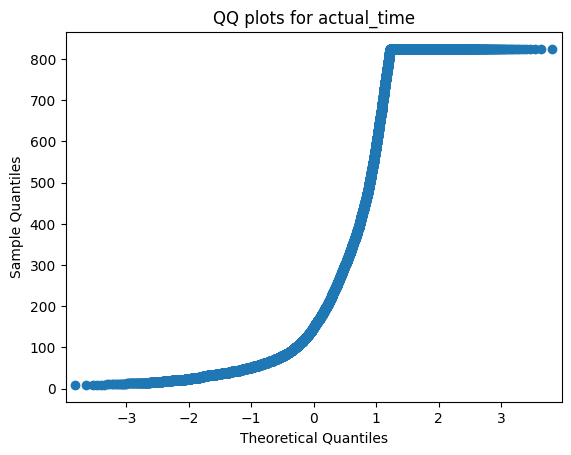

In [ ]:
sm.qqplot(data = segment_trip['actual_time'])
plt.title('QQ plots for actual_time')
plt.show()

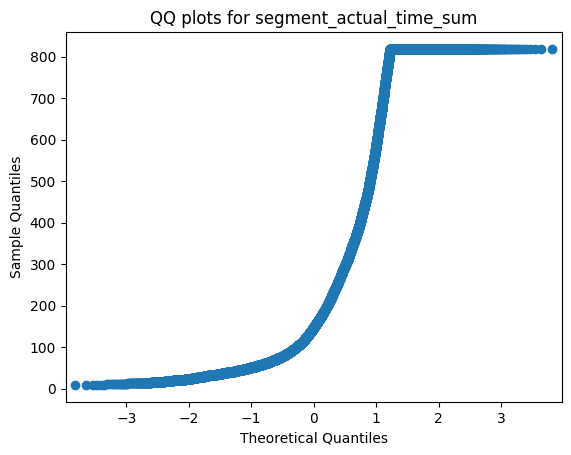

In [ ]:
sm.qqplot(data = segment_trip['segment_actual_time_sum'])
plt.title('QQ plots for segment_actual_time_sum')
plt.show()


Normality test failed for both actual_time aggregated value and segment_actual_time aggregated value.

Checking for homogeneity of variances for both actual_time aggregated value and segment_actual_time aggregated value using Levene's test.

In [ ]:
print("Levene Variance test for actual_time aggregated value and segment_actual_time aggregated value:",stats.levene(segment_trip.actual_time,segment_trip.segment_actual_time_sum))

Levene Variance test for actual_time aggregated value and segment_actual_time aggregated value: LeveneResult(statistic=0.3088203522379214, pvalue=0.5784091635670494)


Variances are similar for both actual_time aggregated value and segment_actual_time aggregated value. Proceeding with T-test   to check for similarity.

In [ ]:
stats.ttest_ind(segment_trip.actual_time,segment_trip.segment_actual_time_sum)

TtestResult(statistic=0.7345028793945387, pvalue=0.4626481180818163, df=29632.0)

p-value for T-test is greater than 0.05, we can confidently state that OSRM time aggregated value and segment OSRM time aggregated
value are similar.

Both actual_time aggregated value and segment_actual_time aggregated value are  similar.

c. Perform hypothesis to check whether .OSRM distance aggregated value and segment OSRM distance
aggregated value are similiar.

* Null Hypothesis (H_0) : OSRM distance aggregated value and segment OSRM distance are same.

* Alternate Hypothesis (H_a) : OSRM distance aggregated value and segment OSRM distance are not same.

Level of significance is considered to be 0.05.

Before apply T-test, we need to check for normality of data

In [ ]:
segment_trip[["osrm_distance","segment_osrm_distance_sum"]].describe()

,osrm_distance,segment_osrm_distance_sum
count,14817.000000,14817.000000
mean,138.518215,146.940017
std,147.724504,155.186921
min,9.072900,9.072900
25%,30.819200,32.654500
50%,65.618800,70.154400
75%,208.475000,218.802400
max,474.958700,498.024250


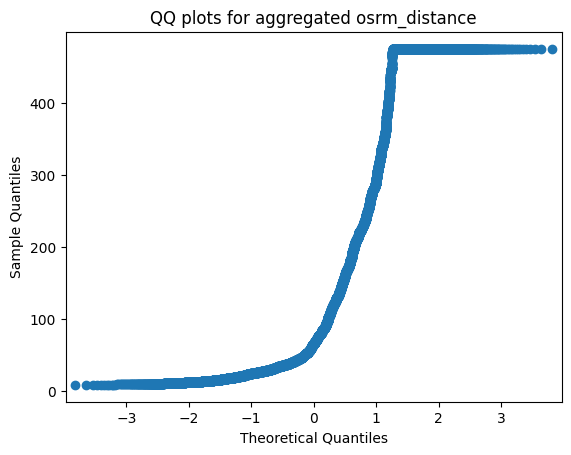

In [ ]:
sm.qqplot(data = segment_trip['osrm_distance'])
plt.title('QQ plots for aggregated osrm_distance')
plt.show()

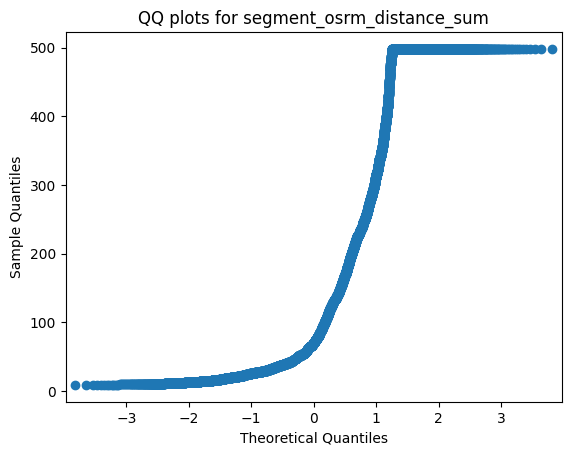

In [ ]:
sm.qqplot(data = segment_trip['segment_osrm_distance_sum'])
plt.title('QQ plots for segment_osrm_distance_sum')
plt.show()

In [ ]:
print("Levene Variance test for actual_time aggregated value and segment_actual_time aggregated value:",
      stats.levene(segment_trip.osrm_distance,segment_trip.segment_osrm_distance_sum))

Levene Variance test for actual_time aggregated value and segment_actual_time aggregated value: LeveneResult(statistic=15.608115475223101, pvalue=7.809983647427559e-05)


Since OSRM distance aggregated value and segment OSRM distance
aggregated value both do not follow normality and also do not have equal variances, T-test and KS-test both are shown.

In [ ]:
stats.ttest_ind(segment_trip.osrm_distance,segment_trip.segment_osrm_distance_sum)

TtestResult(statistic=-4.784678480306622, pvalue=1.720851753713114e-06, df=29632.0)

In [ ]:
stats.mannwhitneyu(segment_trip.osrm_distance,segment_trip.segment_osrm_distance_sum)

MannwhitneyuResult(statistic=104992447.5, pvalue=8.492449065789921e-11)

**p-value for T-test and for Mann-Whitneyu test are less than 0.05, we can confidently state that OSRM time aggregated value and segment OSRM time aggregated
value are not similar.**

In [ ]:
# OSRM time aggregated value and segment OSRM time aggregated value.

d. Perform hypothesis to check whether OSRM time aggregated value and segment OSRM time aggregated value are similar or not.

* Null Hypothesis (H_0) : OSRM time aggregated value and segment_OSRM_time aggregated value are same.

* Alternate Hypothesis (H_a) : OSRM time aggregated value and segment
_OSRM_time aggregated value are not same.

Level of significance is considered to be 0.05.

Before apply T-test, we need to check for normality of data.

In [ ]:
segment_trip[["osrm_time","segment_osrm_time_sum"]].describe()

,osrm_time,segment_osrm_time_sum
count,14817.000000,14817.000000
mean,114.875380,126.123844
std,116.308921,128.453228
min,6.000000,6.000000
25%,29.000000,31.000000
50%,60.000000,65.000000
75%,168.000000,185.000000
max,376.500000,416.000000


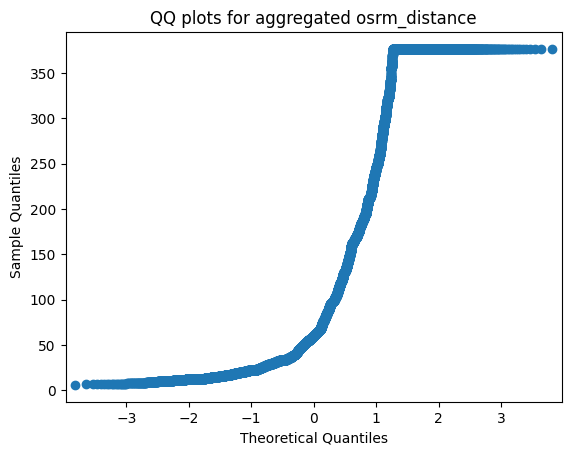

In [ ]:
sm.qqplot(data = segment_trip['osrm_time'])
plt.title('QQ plots for aggregated osrm_distance')
plt.show()

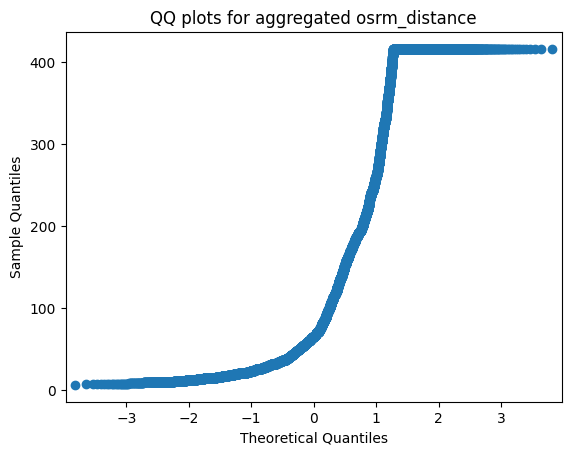

In [ ]:
sm.qqplot(data = segment_trip['segment_osrm_time_sum'])
plt.title('QQ plots for aggregated osrm_distance')
plt.show()

In [ ]:
print("Levene Variance test for osrm_time aggregated value and segment_osrm_time_sum aggregated value:",
      stats.levene(segment_trip.osrm_time,segment_trip.segment_osrm_time_sum))

Levene Variance test for osrm_time aggregated value and segment_osrm_time_sum aggregated value: LeveneResult(statistic=59.07047822994247, pvalue=1.568182390292768e-14)


* Normality and Levene test both failed for osrm_time aggregated value and segment_osrm_time_sum aggregated value

In [ ]:
stats.ttest_ind(segment_trip.osrm_time,segment_trip.segment_osrm_time_sum)

TtestResult(statistic=-7.901512014726942, pvalue=2.8503708528416904e-15, df=29632.0)

**p-value is less than 0.05, therefore reject null hypothesis. Osrm_time aggregated value and segment_osrm_time_sum aggregated value are different.**

###One hot encoding, label encoding and Standard Scaler

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

categorical_cols = ["data","route_type"]
# Create OneHotEncoder object
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # Adjust parameters as needed

# Fit the encoder on the categorical features
encoder.fit(segment_trip[categorical_cols])

# Transform categorical features into one-hot encoded data
encoded_data = encoder.transform(segment_trip[categorical_cols])

# Create new columns for encoded features (optional)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate encoded features with the original DataFrame (excluding categorical features)
segment_trip = pd.concat([segment_trip, encoded_df], axis=1)

segment_trip.head()

,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),377.202161,824.5,376.5,474.9587,818.5,416.0,498.02425,1370.601791,0.0,1.0,0.0,1.0
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),73.186911,143.0,68.0,85.1110,141.0,65.0,84.18940,181.611874,0.0,1.0,1.0,0.0
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),377.202161,824.5,376.5,474.9587,818.5,416.0,498.02425,1370.601791,0.0,1.0,0.0,1.0
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),17.175274,59.0,15.0,19.6800,59.0,16.0,19.87660,100.494935,0.0,1.0,1.0,0.0
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),127.448500,341.0,117.0,146.7918,340.0,115.0,146.79190,718.349042,0.0,1.0,0.0,1.0


In [ ]:
#label encoding

segment_trip["route_type"] = segment_trip["route_type"].apply(lambda x: 1 if x == "FTL" else 0)

In [ ]:

# Select available columns for scaling
num_cols = ['actual_distance_to_destination', 'actual_time',
                   'osrm_time', 'osrm_distance', 'segment_actual_time_sum',
                   'segment_osrm_distance_sum', 'segment_osrm_time_sum']
data_to_scale = segment_trip[num_cols]

standard_scale = StandardScaler()

# fit the StandardScaler
segment_trip[num_cols] = standard_scale.fit_transform(data_to_scale)

segment_trip.head(5)


,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,1,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2.284299,2.148616,2.249470,2.277563,2.148755,2.256743,2.262408,1370.601791,0.0,1.0,0.0,1.0
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,0,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),-0.305588,-0.463140,-0.403038,-0.361545,-0.465469,-0.475861,-0.404369,181.611874,0.0,1.0,1.0,0.0
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,1,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2.284299,2.148616,2.249470,2.277563,2.148755,2.256743,2.262408,1370.601791,0.0,1.0,0.0,1.0
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,0,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),-0.782748,-0.785059,-0.858737,-0.804486,-0.781877,-0.857336,-0.818804,100.494935,0.0,1.0,1.0,0.0
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,1,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),0.156663,0.295668,0.018268,0.056009,0.302399,-0.086601,-0.000954,718.349042,0.0,1.0,0.0,1.0


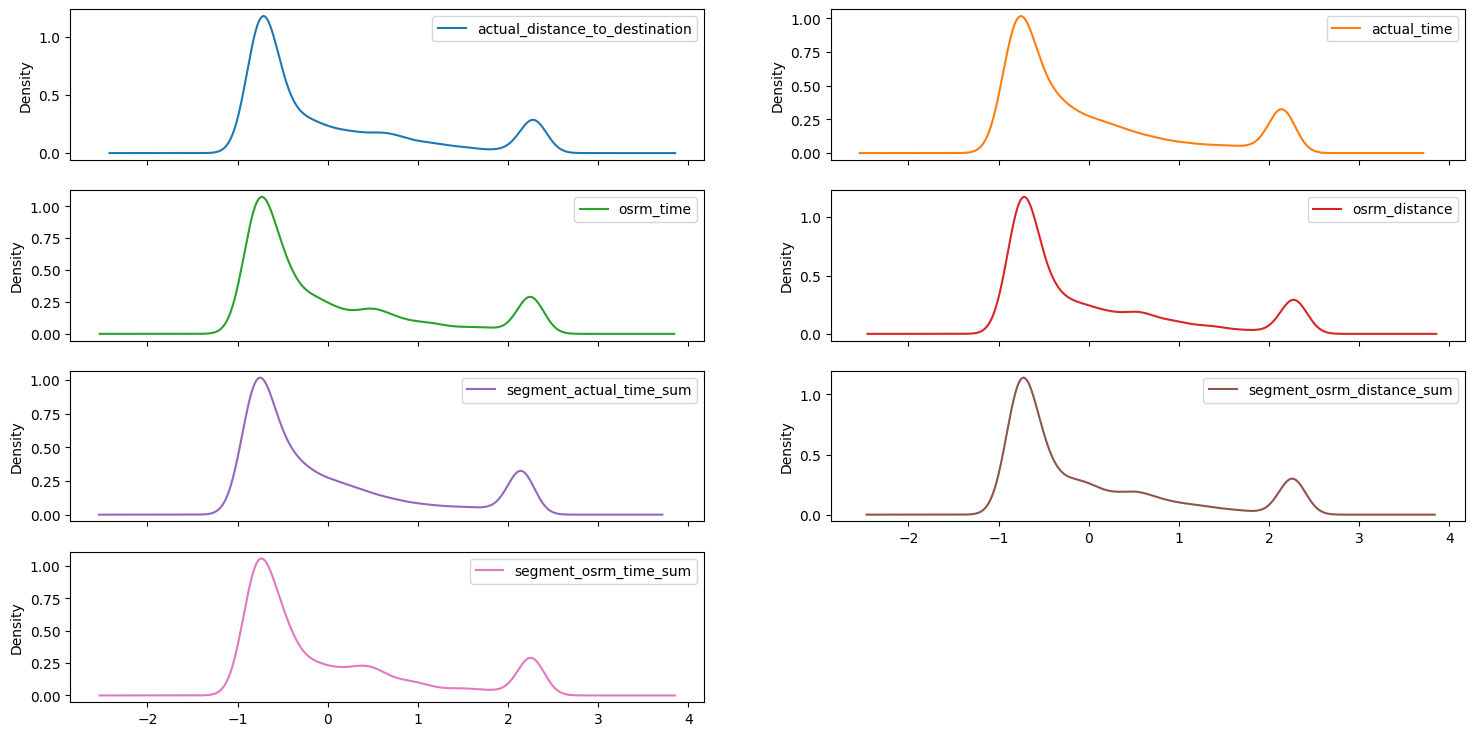

In [ ]:
segment_trip[num_cols].plot(kind='kde', subplots=True, layout=(4, 2), figsize=(18, 9))
plt.show()

* segment_actual_time and actual_time follows same distribution. However, orsm_time and segment_osrm_time_sum differs only a little from both.
* segment_osrm_distance_sum and osrm_distance differs only a little between 0 and 1.
* actual_diatance and osrm_disance also differs a little between 0 and 1.

###Insights :


* There are 144867 data entries in the dataset.
* There are 14817 unique entries, 1508 unique source centers, 1481 unique destination centers, 1260 unique source cities and 1256 unique destination cities and 31 states/UT.
* Some of the entries for segment_actual_time are wrongly entered as negative values which can not be true. Changing such values with their modulus.
* Huge difference in 75th percentiles and maximum values in all numerical values indicates presence of outliers.
* Dataset has entries for 2018 year for two months September and October.
* No trips are listed for day number 4 to from day number 10.
* Wednesday has most traffic as comparison to other days of week.
* Most trips are started after 8 pm as traffic regulation ease off a little bit after 8 pm till 4 am.
* FTL is preferred over Carting. 60% of trips are Full load Truck and 40% follows Carting.
* Most trips are for training purpose. 72% of trips are done under training and rest 28% are for testing purpose.
* Traffic is high in middle of month.
* Most orders are sourced from the states like Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana and Uttar Pradesh.
* Maximum number of trips originated from Bengaluru city followed by Gurgaon, Bhiwandi, Mumbai and Delhi. It indicates the seller base is strong in these cities.
* Maximum number of trips are for Bengaluru city followed by Mumbai, Gurgaon, Hyderabad and Bhiwandi. It indicates the seller base is strong in these cities.
* Features actual_time & osrm_time are statistically different.

* Features actual_time and segment_actual_time are statistically similar.

* Features osrm_distance and segment_osrm_distance are statistically different from each other.

* Both the osrm_time & segment_osrm_time are not statistically same.

Recommendations:

It is difficult to provide recommendations based on two month's dataset. However, following points may be implemented :

* Data Quality:

  * Incomplete Feature Information: The dataset lacks complete information for some features, while others require a deeper understanding. Address these issues to ensure accurate model training and analysis.
* Seasonality and Opportunities:

  * Festive Season Spike: The dataset includes data from September and October, historically high volume months for online orders. Collaborate with online platforms and registered sellers to leverage this peak season.
* Route Optimization:

  * Cost and Feedback Integration: Include route-based costs and feedback (road conditions, tolls, overhead expenses) to optimize trip planning based on priorities (time, distance, or cost).
* Vehicle Maintenance:

  * Scheduled Maintenance Window: Since no trips occur between the 4th and 10th of each month, utilize this window for routine vehicle maintenance and servicing. This improves reliability, fuel efficiency, and driver safety.
* Machine Learning Model Improvement:

  * Discrepancies between Actual and Predicted Values: Investigated discrepancies between actual and predicted values for distance and travel time (actual vs. OSRM, OSRM segments vs. actual segments). Implement strategies to improve model accuracy.
* Multimodal Transportation:

  * Exploring Rail Transport: Analyze the feasibility of using railways for long-distance or interstate goods transportation to potentially reduce costs or enhance efficiency.